**Introduction**

To know which factor may affect the student's performance, we classify the score into couple of ranks, and figure out which feature affects the score more significant. The independent variables are follow:

The aim here is to analyse what perticular factors may affect a students perfomance and to highlight it. The factors that we are looking are:

gender : sex of students

lunch : having lunch before test (normal or abnormal)

Test preparation: complete or not complete

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import csv


In [26]:
from google.colab import files
uploaded = files.upload()

Saving exam_results.csv to exam_results (1).csv


In [27]:
file = "exam_results.csv"
import io
dataf = pd.read_csv(io.BytesIO(uploaded[file]))
dataf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
os.listdir(".")

['.config', 'exam_results.csv', 'drive', 'exam_results (1).csv', 'sample_data']

In [29]:
dataf.rename(columns={"race/ethnicity":"ethnicity","parental level of education":"parent_education"
                    ,"math score":"math","reading score":"reading","writing score":"writing",
                    "test preparation course":"preparation"},inplace=True)
dataf.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [30]:
dataf.dtypes

gender              object
ethnicity           object
parent_education    object
lunch               object
preparation         object
math                 int64
reading              int64
writing              int64
dtype: object

## **Finding average scores for each gender**

Scores for Females:

In [31]:
female_scores = dataf[dataf["gender"] == 'female']
female_scores.head()


,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92


In [32]:
FemMathAv = female_scores['math'].mean()
print("Female math average:", FemMathAv)
FemRedAv = female_scores['reading'].mean()
print("Female reading average:",FemRedAv)
FemWritAv = female_scores['writing'].mean()
print("Female writing average:",FemWritAv)

Female math average: 63.633204633204635
Female reading average: 72.60810810810811
Female writing average: 72.46718146718146


Scores for Males:

In [33]:
male_scores = dataf[dataf["gender"] == 'male']
male_scores.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
10,male,group C,associate's degree,standard,none,58,54,52


In [34]:
MaleMathAv = male_scores['math'].mean()
print("Male math average:", MaleMathAv)
MaleRedAv = male_scores['reading'].mean()
print("Male reading average:", MaleRedAv)
MaleWritAv = male_scores['writing'].mean()
print("Male writing average:", MaleWritAv)

Male math average: 68.72821576763485
Male reading average: 65.47302904564316
Male writing average: 63.31120331950208


**Graphic these averages**

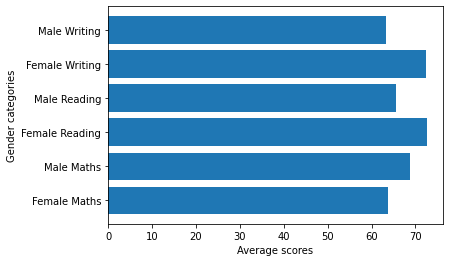

In [35]:
x = np.array(["Female Maths", "Male Maths", "Female Reading", "Male Reading","Female Writing","Male Writing"])
y = np.array([FemMathAv, MaleMathAv, FemRedAv, MaleRedAv, FemWritAv, MaleWritAv])

plt.barh(x,y)
plt.xlabel("Average scores")
plt.ylabel("Gender categories")
plt.show()

## **Scores based on lunch**

Standard lunch before the test

In [36]:
standard_lunch = dataf[dataf["lunch"] == 'standard']
standard_lunch.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


Math scores boxplot

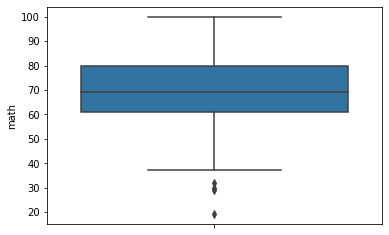

In [37]:
sns.boxplot( y=standard_lunch["math"] );
plt.show()

Reading scores boxplot

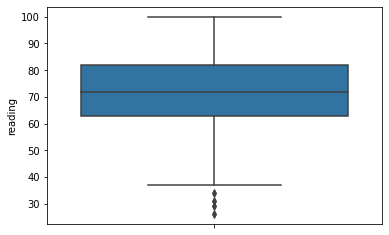

In [38]:
sns.boxplot( y=standard_lunch["reading"] );
plt.show()

Writing scores boxplot

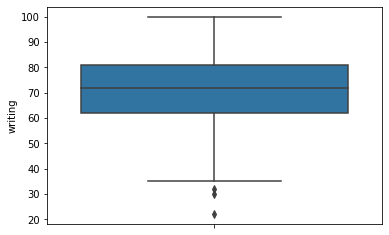

In [39]:
sns.boxplot( y=standard_lunch["writing"] );
plt.show()

Free/Reduced lunch before the test

In [40]:
reduced_lunch = dataf[dataf["lunch"] == 'free/reduced']
reduced_lunch.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
3,male,group A,associate's degree,free/reduced,none,47,57,44
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50
17,female,group B,some high school,free/reduced,none,18,32,28


Math scores boxplot

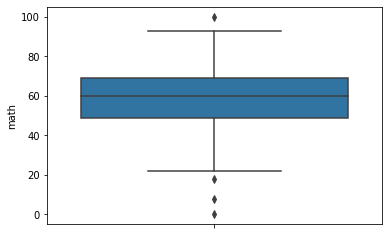

In [41]:
sns.boxplot( y=reduced_lunch["math"] );
plt.show()

Reading scores boxplot

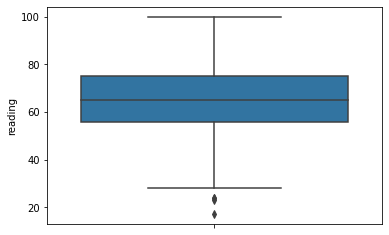

In [42]:
sns.boxplot( y=reduced_lunch["reading"] );
plt.show()

Writing score boxplot

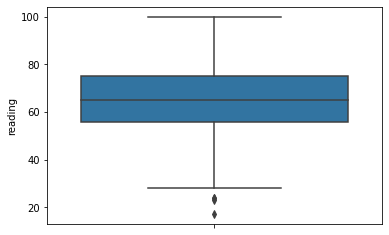

In [43]:
sns.boxplot( y=reduced_lunch["reading"] );
plt.show()

## **Scores Based on test preparation**

 Complete Preparation

In [46]:
complete_prep = dataf[dataf["preparation"] == 'completed']
complete_prep.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
1,female,group C,some college,standard,completed,69,90,88
6,female,group B,some college,standard,completed,88,95,92
8,male,group D,high school,free/reduced,completed,64,64,67
13,male,group A,some college,standard,completed,78,72,70
18,male,group C,master's degree,free/reduced,completed,46,42,46


Math scores boxplot

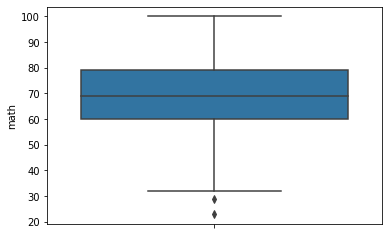

In [47]:
sns.boxplot( y=complete_prep["math"] );
plt.show()

Reading scores boxplot

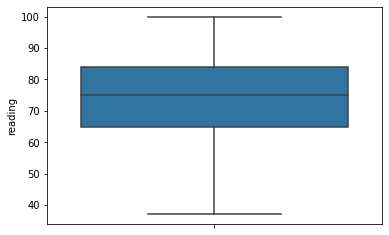

In [48]:
sns.boxplot( y=complete_prep["reading"] );
plt.show()

Writing scores boxplot

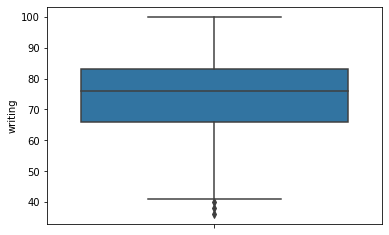

In [49]:
sns.boxplot( y=complete_prep["writing"] );
plt.show()

No test Preparation

In [50]:
no_prep = dataf[dataf["preparation"] == 'none']
no_prep.head()

,gender,ethnicity,parent_education,lunch,preparation,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


Math scores boxplot

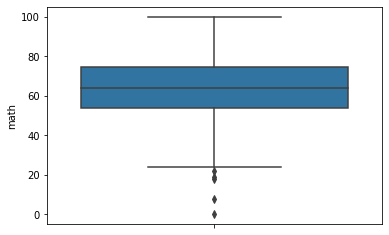

In [51]:
sns.boxplot( y=no_prep["math"] );
plt.show()

Reading scores boxplot

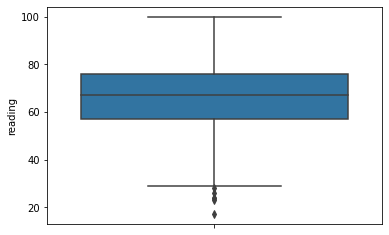

In [52]:
sns.boxplot( y=no_prep["reading"] );
plt.show()

Writing scores boxplot

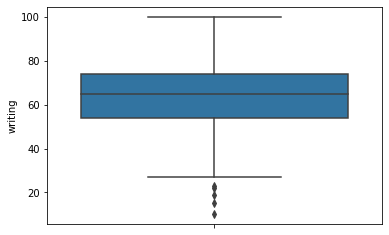

In [53]:
sns.boxplot( y=no_prep["writing"] );
plt.show()

 Student Exams analysis by Joshua Ssemwanga